# Importing important library


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

# Putting data set into DataFrame

In [2]:
data = pd.read_csv("cleaned-IG-data.csv", encoding = "utf-8",sep=",")

In [3]:
data = data.drop('Unnamed: 0', axis = 1)
data

,Impressions,Saves,Comments,Shares,Likes,Profile Visits,Follows,Caption,Hashtags,fullCaption,Tokenized_Text,Stemmed_Text,tokenizedCaptions
0,3920,98,9,5,162,35,2,Here are some of the most important data visua...,#finance?#money?#business?#investing?#investme...,here are some of the most important data visua...,"['important', 'data', 'visualizations', 'every...","['import', 'data', 'visual', 'everi', 'financi...","['important', 'data', 'visualization', 'every'..."
1,5394,194,7,14,224,48,10,Here are some of the best data science project...,#healthcare?#health?#covid?#data?#datascience?...,here are some of the best data science project...,"['best', 'data', 'science', 'project', 'ideas'...","['best', 'data', 'scienc', 'project', 'idea', ...","['best', 'data', 'science', 'project', 'idea',..."
2,4021,41,11,1,131,62,12,Learn how to train a machine learning model an...,#data?#datascience?#dataanalysis?#dataanalytic...,learn how to train a machine learning model an...,"['learn', 'train', 'machine', 'learning', 'mod...","['learn', 'train', 'machin', 'learn', 'model',...","['learn', 'train', 'machine', 'learning', 'mod..."
3,4528,172,10,7,213,23,8,Here?s how you can write a Python program to d...,#python?#pythonprogramming?#pythonprojects?#py...,here?s how you can write a python program to d...,"['heres', 'write', 'python', 'program', 'detec...","['here', 'write', 'python', 'program', 'detect...","['here', 'write', 'python', 'program', 'detect..."
4,2518,96,5,4,123,8,0,Plotting annotations while visualizing your da...,#datavisualization?#datascience?#data?#dataana...,plotting annotations while visualizing your da...,"['plotting', 'annotations', 'visualizing', 'da...","['plot', 'annot', 'visual', 'data', 'consid', ...","['plotting', 'annotation', 'visualizing', 'dat..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
114,13700,573,2,38,373,73,80,Here are some of the best data science certifi...,#datascience?#datasciencejobs?#datasciencetrai...,here are some of the best data science certifi...,"['best', 'data', 'science', 'certifications', ...","['best', 'data', 'scienc', 'certif', 'choos', ...","['best', 'data', 'science', 'certification', '..."
115,5731,135,4,1,148,20,18,Clustering is a machine learning technique use...,#machinelearning?#machinelearningalgorithms?#d...,clustering is a machine learning technique use...,"['clustering', 'machine', 'learning', 'techniq...","['cluster', 'machin', 'learn', 'techniqu', 'us...","['clustering', 'machine', 'learning', 'techniq..."
116,4139,36,0,1,92,34,10,Clustering music genres is a task of grouping ...,#machinelearning?#machinelearningalgorithms?#d...,clustering music genres is a task of grouping ...,"['clustering', 'music', 'genres', 'task', 'gro...","['cluster', 'music', 'genr', 'task', 'group', ...","['clustering', 'music', 'genre', 'task', 'grou..."
117,32695,1095,2,75,549,148,214,Here are some of the best data science certifi...,#datascience?#datasciencejobs?#datasciencetrai...,here are some of the best data science certifi...,"['best', 'data', 'science', 'certifications', ...","['best', 'data', 'scienc', 'certif', 'choos', ...","['best', 'data', 'science', 'certification', '..."


### Bootstrapping the current dataset

In [4]:
n_samples = 20

def bootstrap_data(df, n_samples):
    bootstrap_samples = []
    for i in range(n_samples):
        bootstrap_sample = pd.DataFrame()
        for column in df.columns:
            sample = df[column].sample(n=len(df), replace=True, random_state=1000).reset_index(drop=True)
            bootstrap_sample[column] = sample
        bootstrap_samples.append(bootstrap_sample)
    return bootstrap_samples

bootstrap_samples = bootstrap_data(data, n_samples)

for bootstrap_sample in bootstrap_samples:
    data = pd.concat([data, bootstrap_sample], ignore_index=True)

data

,Impressions,Saves,Comments,Shares,Likes,Profile Visits,Follows,Caption,Hashtags,fullCaption,Tokenized_Text,Stemmed_Text,tokenizedCaptions
0,3920,98,9,5,162,35,2,Here are some of the most important data visua...,#finance?#money?#business?#investing?#investme...,here are some of the most important data visua...,"['important', 'data', 'visualizations', 'every...","['import', 'data', 'visual', 'everi', 'financi...","['important', 'data', 'visualization', 'every'..."
1,5394,194,7,14,224,48,10,Here are some of the best data science project...,#healthcare?#health?#covid?#data?#datascience?...,here are some of the best data science project...,"['best', 'data', 'science', 'project', 'ideas'...","['best', 'data', 'scienc', 'project', 'idea', ...","['best', 'data', 'science', 'project', 'idea',..."
2,4021,41,11,1,131,62,12,Learn how to train a machine learning model an...,#data?#datascience?#dataanalysis?#dataanalytic...,learn how to train a machine learning model an...,"['learn', 'train', 'machine', 'learning', 'mod...","['learn', 'train', 'machin', 'learn', 'model',...","['learn', 'train', 'machine', 'learning', 'mod..."
3,4528,172,10,7,213,23,8,Here?s how you can write a Python program to d...,#python?#pythonprogramming?#pythonprojects?#py...,here?s how you can write a python program to d...,"['heres', 'write', 'python', 'program', 'detec...","['here', 'write', 'python', 'program', 'detect...","['here', 'write', 'python', 'program', 'detect..."
4,2518,96,5,4,123,8,0,Plotting annotations while visualizing your da...,#datavisualization?#datascience?#data?#dataana...,plotting annotations while visualizing your da...,"['plotting', 'annotations', 'visualizing', 'da...","['plot', 'annot', 'visual', 'data', 'consid', ...","['plotting', 'annotation', 'visualizing', 'dat..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2494,4115,122,6,3,191,31,6,Here are two best ways to count the number of ...,#python?#pythonprogramming?#pythonprojects?#py...,here are two best ways to count the number of ...,"['two', 'best', 'ways', 'count', 'number', 'le...","['two', 'best', 'way', 'count', 'number', 'let...","['two', 'best', 'way', 'count', 'number', 'let..."
2495,2621,22,5,1,76,26,0,Learn how to analyze a candlestick chart as a ...,#stockmarket?#investing?#stocks?#trading?#mone...,learn how to analyze a candlestick chart as a ...,"['learn', 'analyze', 'candlestick', 'chart', '...","['learn', 'analyz', 'candlestick', 'chart', 'd...","['learn', 'analyze', 'candlestick', 'chart', '..."
2496,5055,101,7,11,159,17,6,"In Data Science, Time Series Analysis is a met...",#timeseries?#time?#statistics?#datascience?#bi...,"in data science, time series analysis is a met...","['data', 'science', 'time', 'series', 'analysi...","['data', 'scienc', 'time', 'seri', 'analysi', ...","['data', 'science', 'time', 'series', 'analysi..."
2497,11068,214,7,8,250,39,34,Here are some of the best data science project...,#data?#datascience?#dataanalysis?#dataanalytic...,here are some of the best data science project...,"['best', 'data', 'science', 'project', 'ideas'...","['best', 'data', 'scienc', 'project', 'idea', ...","['best', 'data', 'science', 'project', 'idea',..."


In [5]:
data = data.reindex()

In [6]:
# Extract list of columns
data_cols = list(data.columns)
print('Dataset columns: {}'.format(data_cols))

Dataset columns: ['Impressions', 'Saves', 'Comments', 'Shares', 'Likes', 'Profile Visits', 'Follows', 'Caption', 'Hashtags', 'fullCaption', 'Tokenized_Text', 'Stemmed_Text', 'tokenizedCaptions']


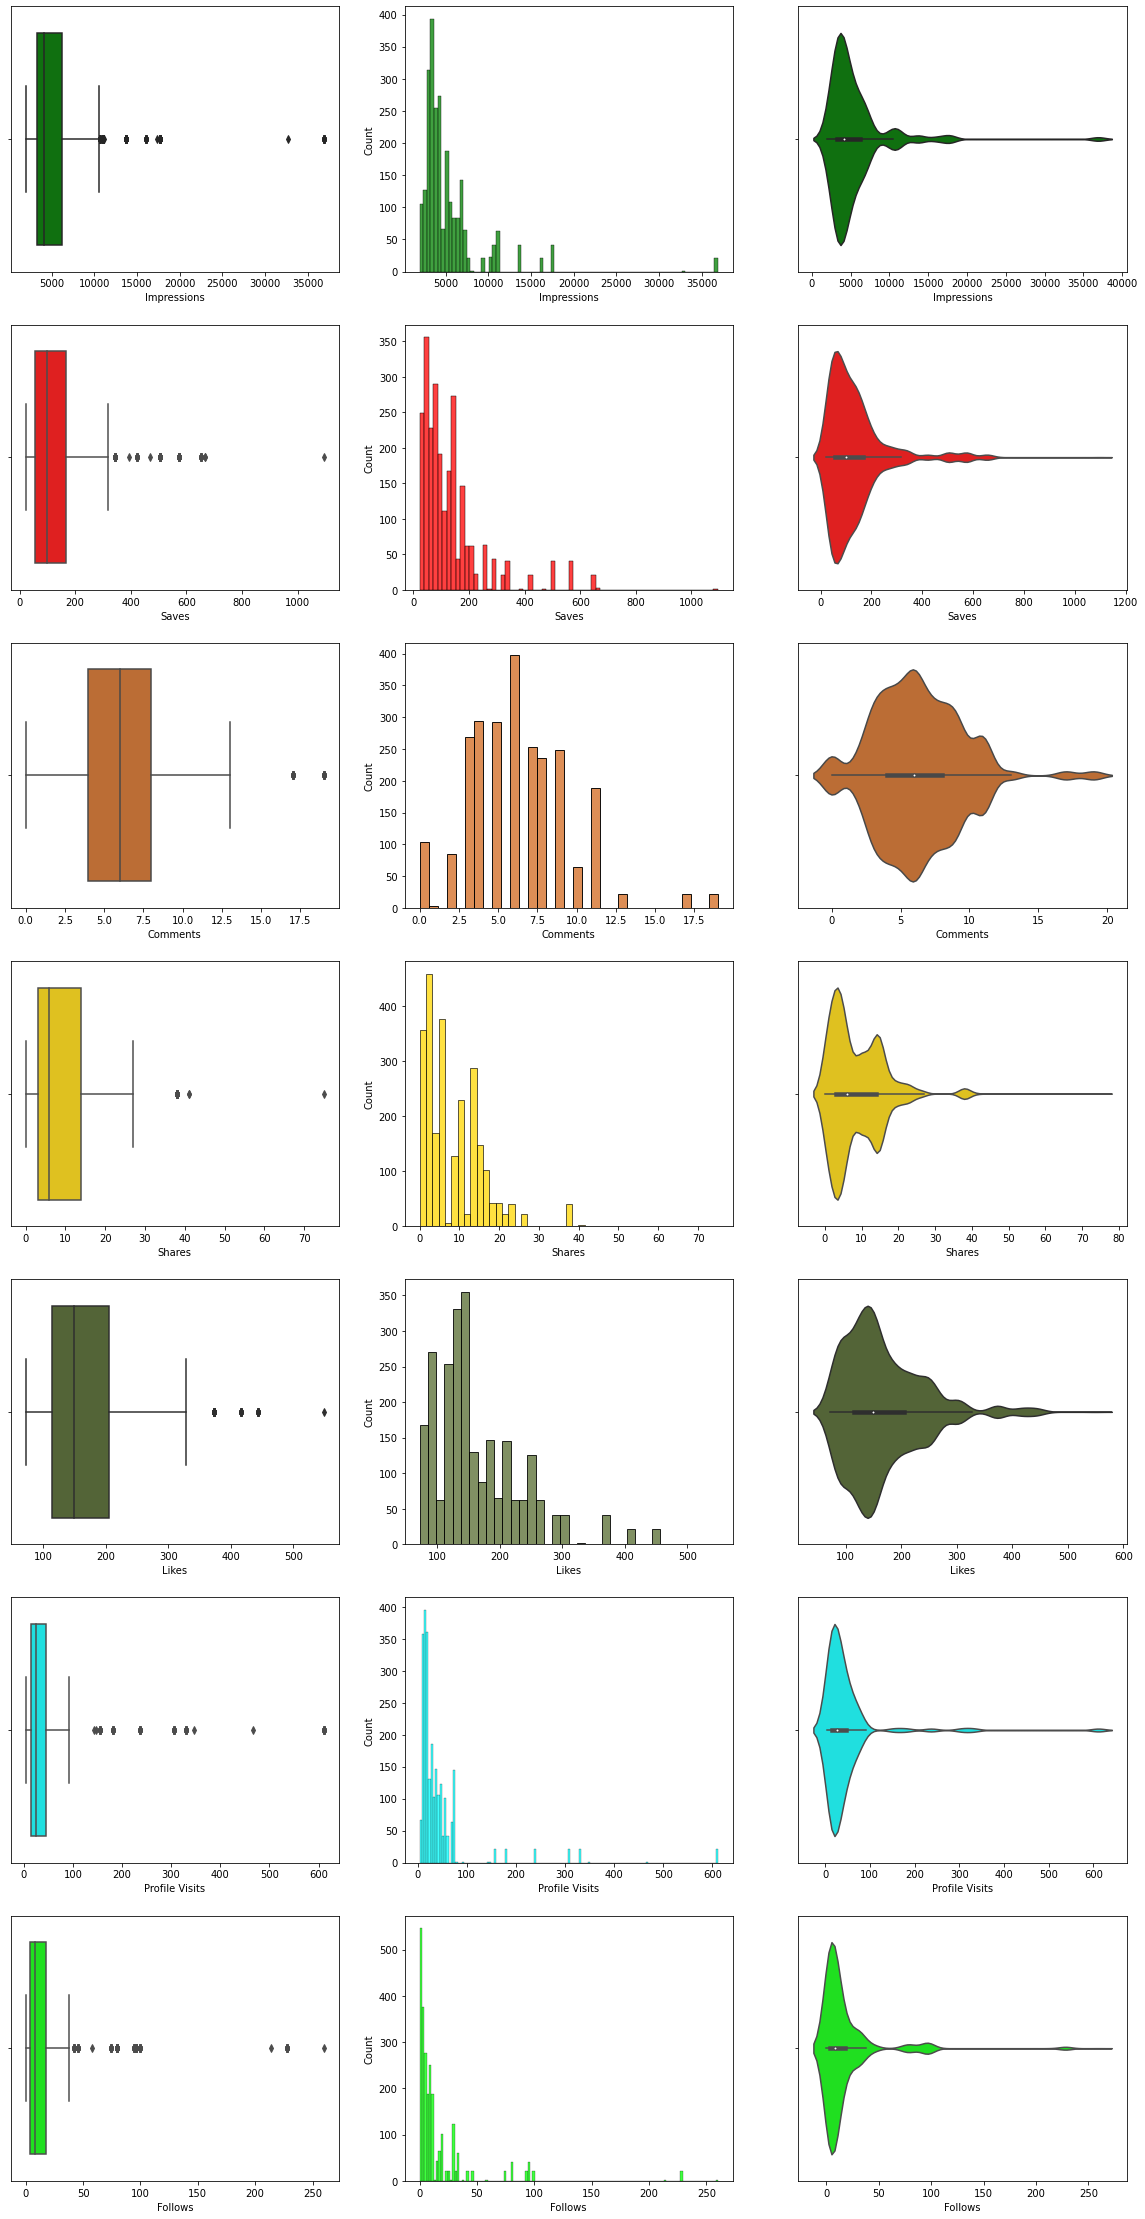

In [7]:
f, axes = plt.subplots(7,3, figsize=(20,40))
colours = ['green', 'red', 'chocolate', 'gold', 'darkolivegreen', 'aqua', 'lime']


count = 0
for i in range(7):
    sb.boxplot(x = data[data_cols[i]], orient = 'h', color = colours[count], ax = axes[count,0])
    sb.histplot(x = data[data_cols[i]], color = colours[count], ax = axes[count,1])
    sb.violinplot(x = data[data_cols[i]], color = colours[count], ax = axes[count,2])
    count+=1

Impressions       210
Saves             170
Comments           44
Shares             44
Likes              85
Profile Visits    130
Follows           213
dtype: int64

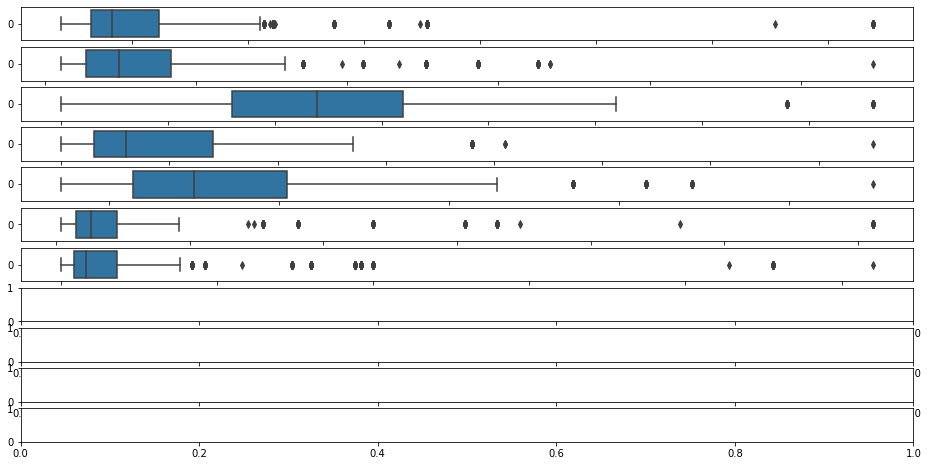

In [8]:
# Extract the two variables
targetData = data[['Impressions', 'Saves', 'Comments','Shares', 'Likes', 'Profile Visits', 'Follows']].copy()
# Make a clean "copy" and not just a slice of the dataset

# Draw the boxplots
f, axes = plt.subplots(11, 1, figsize=(16, 8))

sb.boxplot(data = targetData["Impressions"], orient = "h", ax = axes[0])
sb.boxplot(data = targetData["Saves"], orient = "h", ax = axes[1])
sb.boxplot(data = targetData["Comments"], orient = "h", ax = axes[2])
sb.boxplot(data = targetData["Shares"], orient = "h", ax = axes[3])
sb.boxplot(data = targetData["Likes"], orient = "h", ax = axes[4])
sb.boxplot(data = targetData["Profile Visits"], orient = "h", ax = axes[5])
sb.boxplot(data = targetData["Follows"], orient = "h", ax = axes[6])


# Calculate the quartiles
Q1 = targetData.quantile(0.25)
Q3 = targetData.quantile(0.75)

# Rule to identify outliers
rule = ((targetData < (Q1 - 1.5 * (Q3 - Q1))) | (targetData > (Q3 + 1.5 * (Q3 - Q1))))

# Count the number of outliers
rule.sum()

In [9]:
# Calculate the quartiles
Q1 = targetData.quantile(0.25)
Q3 = targetData.quantile(0.75)

# Rule to identify outliers
rule = ((targetData < (Q1 - 1.5 * (Q3 - Q1))) | (targetData > (Q3 + 1.5 * (Q3 - Q1))))

# Check the dataframe rule
rule

,Impressions,Saves,Comments,Shares,Likes,Profile Visits,Follows
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
2494,False,False,False,False,False,False,False
2495,False,False,False,False,False,False,False
2496,False,False,False,False,False,False,False
2497,True,False,False,False,False,False,False


In [10]:
# Find the rows where ANY column is True
outliers = rule.any(axis = 1)   # axis 0 is row, 1 is column

# Check the outliers -- it's a boolean Series
outliers


0       False
1       False
2       False
3       False
4       False
        ...  
2494    False
2495    False
2496    False
2497     True
2498    False
Length: 2499, dtype: bool

In [11]:
outlierindices = outliers.index[outliers == True]
outlierindices

Int64Index([  14,   16,   22,   26,   40,   49,   51,   54,   64,   67,
            ...
            2420, 2423, 2431, 2434, 2439, 2444, 2455, 2472, 2473, 2497],
           dtype='int64', length=384)

In [12]:
# Remove the outliers based on the row indices obtained above
targetData.drop(axis = 0,               # 0 drops row 1 drops column
                index = outlierindices, # this takes a list as input
                inplace = True)         # not overwritten by default 

# Check the clean data
targetData

,Impressions,Saves,Comments,Shares,Likes,Profile Visits,Follows
0,3920,98,9,5,162,35,2
1,5394,194,7,14,224,48,10
2,4021,41,11,1,131,62,12
3,4528,172,10,7,213,23,8
4,2518,96,5,4,123,8,0
...,...,...,...,...,...,...,...
2493,4467,89,3,16,149,15,0
2494,4115,122,6,3,191,31,6
2495,2621,22,5,1,76,26,0
2496,5055,101,7,11,159,17,6


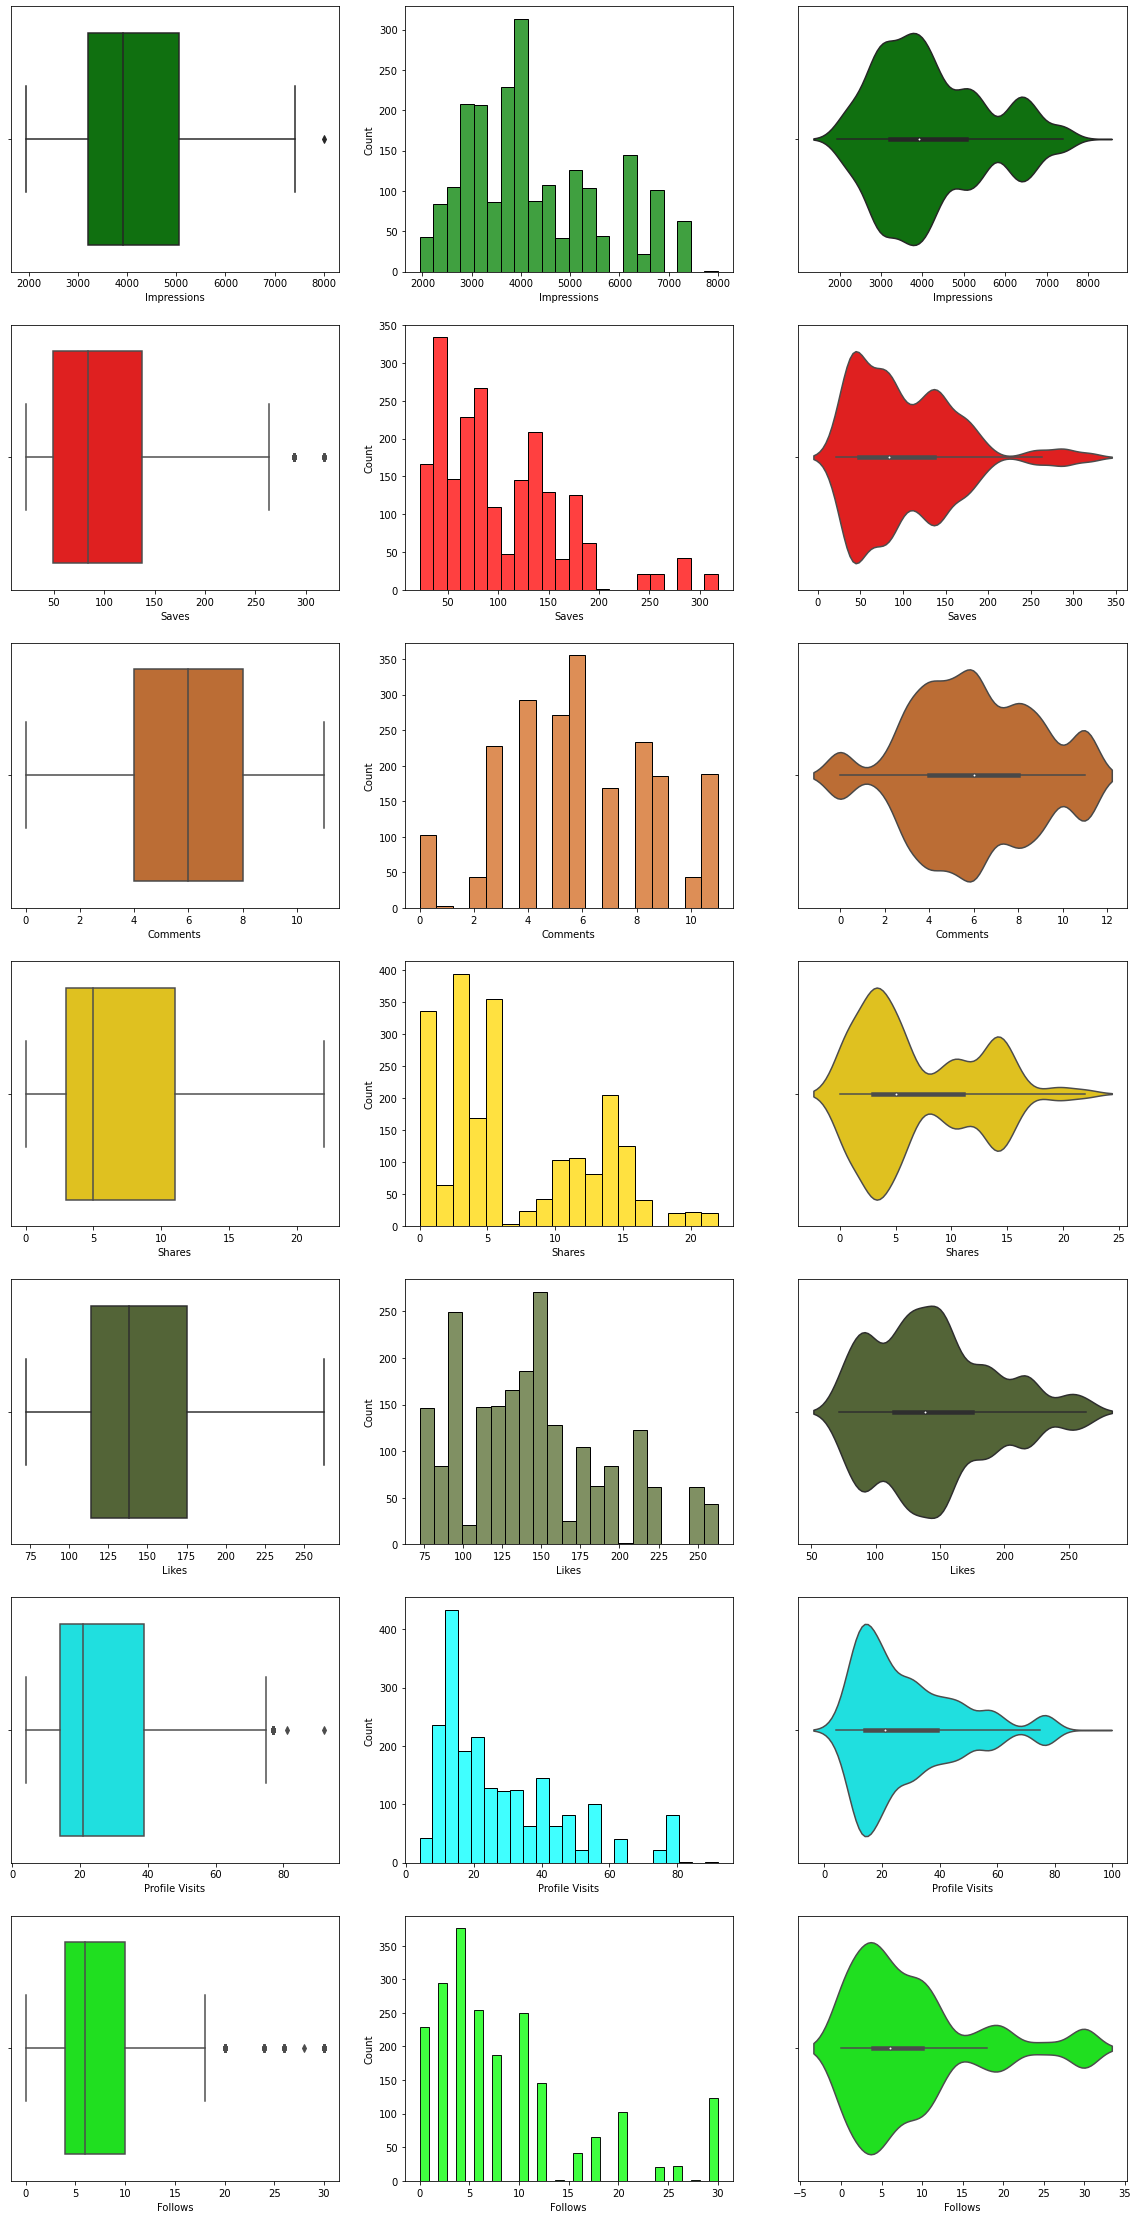

In [15]:
f, axes = plt.subplots(7,3, figsize=(20,40))
colours = ['green', 'red', 'chocolate', 'gold', 'darkolivegreen', 'aqua', 'lime']


count = 0
for i in range(7):
    sb.boxplot(x = targetData[data_cols[i]], orient = 'h', color = colours[count], ax = axes[count,0])
    sb.histplot(x = targetData[data_cols[i]], color = colours[count], ax = axes[count,1])
    sb.violinplot(x = targetData[data_cols[i]], color = colours[count], ax = axes[count,2])
    count+=1

In [16]:
targetData.to_csv("BootstrappedAndNoOutlierAndStructuredData.csv")